# Обучение модель на основе SVM для распознавания рукописных цифр из набора MNIST

#### Загружаем данные из https://www.openml.org/d/554¶

In [6]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

Загруженный датасет содержит в одном массиве обучающие и тестовые данные, потому необходимо их разделить.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, test_size=10000)
y_train = y_train.astype(int)
y_test = y_test.astype(int)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 784)
Test shape: (10000, 784)


#### Воспользуемся методом стохастического градиентного спуска SGDClassifier, который по умолчанию использует метод опорных векторов.

In [8]:
from sklearn import linear_model
# Создадим классификатор: метод опорных векторов
classifier = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
                                        max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, 
                                        random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, 
                                        validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, 
                                        average=False)
# Обучим классификатор
classifier.fit(X_train, y_train)

SGDClassifier()

#### Выполним визуализацию и проверку на тестовых данных.

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

   
    cm = confusion_matrix(y_true, y_pred)
    
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [10]:
expected = y_test
predicted = classifier.predict(X_test)

#### Построим confusion matrix.

Confusion matrix, without normalization
[[ 708    1   44   12    1  170    4    4   12    6]
 [   1 1114    3    2    0    3    1    0    5    2]
 [   0   39  873   15    2   28    3   24   22    6]
 [   0   16   36  768    0  171    1   16   14    8]
 [   0   25   17   14  597   97    2   28   42  133]
 [   0   10    6   17    1  877    4    0   14    9]
 [   0   16   30    4    0  158  773    2   12    1]
 [   1   24   12    6    3   19    0  967    5   32]
 [   0   73   13   19    1  273    2    7  571   11]
 [   0   14    5    6    2  147    0   51    9  703]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

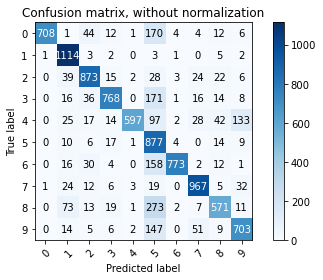

In [11]:
import numpy as np
class_names = np.array(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

plot_confusion_matrix(expected, predicted, classes=class_names,
                      title='Confusion matrix, without normalization')